## churn prediction project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## setting up the validation data

In [3]:
# change view of data
# viewing a section of the data
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# making all names lowercase uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c]= df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Data types

In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [8]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [9]:
# toatalcharge is oject change to mumber
# we ignore strings in the object using coerce
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

## fill the missing values with zeros

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.totalcharges.isnull().sum()

0

In [14]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [15]:
# change churn from yes and no to 1 and 0
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

## setting up the validation framework

In [16]:
# function to split the data
from sklearn.model_selection import train_test_split

In [17]:
# function documentation 
# train_test_split?

In [18]:
# spliting the data
# 20%, 20%, 60%;
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [19]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [21]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [22]:
#unshuffling the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [24]:
# get y variable
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [25]:
# deleting the variable churn from the data
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [26]:
df_full_train.churn

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5634, dtype: int64

In [27]:
df_full_train = df_full_train.reset_index(drop=True)

In [28]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [29]:
# target variable
# we can see you is churn and who is not

# churn rate = 0.269968
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [30]:
# churn rate using mean rate ate which people churn around 27 %
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [31]:
# 3 categorical values
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [32]:
# numerical values
numerical = ['tenure', 'monthlycharges', 'totalcharges']
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [33]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [34]:
df_full_train[categorical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,male,0,yes,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
1,female,0,no,no,yes,no,dsl,yes,yes,yes,yes,no,yes,one_year,no,credit_card_(automatic)
2,male,0,yes,no,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,no,bank_transfer_(automatic)
3,male,0,yes,yes,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,no,electronic_check
4,male,0,no,no,yes,no,dsl,yes,yes,no,yes,yes,no,one_year,no,electronic_check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,male,1,no,no,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check
5630,male,0,no,yes,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check
5631,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check
5632,male,0,no,no,yes,yes,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check


In [35]:
# shows like gender has 2 male or female
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## feature importance

In [36]:
# churn rate within cetain groups eg..
# churn rate in female
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [37]:
# churn rate in male
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [38]:
# difference in global churn and male churn
global_churn_rate = df_full_train.churn.mean()
global_churn_rate - churn_male

0.006754520462819769

In [39]:
# some features  are more important than others
# churn rate in people with partner
churn_with_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_with_partner 

0.20503330866025166

In [40]:
# churn rate in people with no partner
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [41]:
# the greater the diffence the less to churn
global_churn_rate - churn_with_partner

0.06493474245795922

In [42]:
# the lesser the diffence the more to churn
global_churn_rate - churn_no_partner

-0.05984095297455855

## risk ratio

In [43]:
# risk = globalchurnrate / groupchurnrate
# the more closer to 1 the more to churn
# the more far to 1 the lesser to churn 
global_churn_rate / churn_no_partner

0.8185587651278121

In [44]:
df_group = df_full_train.groupby('gender').churn.agg(['mean'], ['count'])
df_group['diff'] = global_churn_rate - df_group['mean']
df_group['risk'] = global_churn_rate / df_group['mean']
df_group

,mean,diff,risk
gender,,,
female,0.276824,-0.006856,0.975233
male,0.263214,0.006755,1.025662


In [45]:
# to get for every categorical values we have
from  IPython.display import display

for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean'], ['count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate 
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


# Mutual information

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [48]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

# chosing the one that has more feature mutual information

In [49]:
# function for mutual info
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [50]:
# function to tell which has more or less mutual information
df_full_train[categorical].apply(mutual_info_churn_score)

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [51]:
# sort values : the most to least important
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: Correlation 
### numerical columns

In [52]:
# measuring dependancy between two varibles
# when it negative (one variable drops the other grows)
# when its positive (one variable grows the other grows)
df_full_train.tenure.max()

72

In [53]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
0,12,19.70,258.35
1,42,73.90,3160.55
2,71,65.15,4681.75
3,71,85.45,6300.85
4,30,70.40,2044.75
...,...,...,...
5629,9,100.50,918.60
5630,60,19.95,1189.90
5631,28,105.70,2979.50
5632,2,54.40,114.10


In [54]:
# tenure is number of months the client has been with us
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [55]:
# most important to the least important
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

## using Scikit-learn to encode categorical features
# One hot encoding

In [56]:
# function for categorizing the categorical value hot ones:
from sklearn.feature_extraction import DictVectorizer
# we can see both numerical and categorical 

dv.get_feature_names_out()

In [57]:
# selecting all values
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [58]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [59]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [60]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

# feature matrices

In [61]:
# featue matrix for training
X_train = dv.transform(train_dicts)

In [62]:
# feature matrix for validation
val_dicts =  df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

##  linear_regression function

In [63]:
def linear_regression(xi):
    result = w0
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    return result

## logistic_regression

In [64]:
# we apply sigmoid to get the probablity
# here we convet the score to numb between 0 and 1
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    result = sigmoid(score)
    return result

## Training logistic regression with scikit-learn

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# the bias
model.intercept_[0]

-0.10903315905866476

In [68]:
# these are the wights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [69]:
# soft probablity
# right side is the probablity of being 1
# left size is the probablity of being 0 
# so on the right we have the probablity of churning
model.predict_proba(X_train)

array([[0.90451999, 0.09548001],
       [0.32067934, 0.67932066],
       [0.36632812, 0.63367188],
       ...,
       [0.46839445, 0.53160555],
       [0.95745577, 0.04254423],
       [0.30127767, 0.69872233]])

In [70]:
# we take the probality to churn
y_pred_train = model.predict_proba(X_train)[:, 1]
y_pred_train

array([0.09548001, 0.67932066, 0.63367188, ..., 0.53160555, 0.04254423,
       0.69872233])

In [71]:
# using the validation set
y_pred_val = model.predict_proba(X_val)[:, 1]
y_pred_val

array([0.00899705, 0.20452262, 0.21222303, ..., 0.1363887 , 0.79976118,
       0.83739932])

In [72]:
# probability to churn for this threshole(passmark to churn or not to)in traing data set 
y_pred_train >= 0.5

array([False,  True,  True, ...,  True, False,  True])

In [73]:
# probability to churn for this threshole(passmark) in validation data set 
y_pred_val >= 0.5

array([False, False, False, ..., False,  True,  True])

In [74]:
# using the train set
churn_decision_train = y_pred_train >= 0.5
# this are the people we can send prmotional sms so as not to churn
df_train[churn_decision_train].customerid

1       1960-uycnn
2       9250-wypll
3       6786-obwqr
6       1452-voqch
7       6653-cbbom
           ...    
4208    5712-ptiww
4211    6128-czomy
4216    7734-dboai
4222    3703-vavcl
4224    1704-nrwye
Name: customerid, Length: 936, dtype: object

In [75]:
# using the validatin set
churn_decision_val = y_pred_val >= 0.5
# this are the people we can send prmotional sms so as not to churn
# our models think this people can churn 
df_val[churn_decision_val].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [76]:
# our models think this people can churn 
df_val[churn_decision_val]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


## see how accurate our predictions are
#here we use acuracy

In [77]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [78]:
churn_decision_val

array([False, False, False, ..., False,  True,  True])

In [79]:
# convert the desionsions to 0 and 1's
churn_decision_val.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [80]:
# so now we can use the churn dessions on predictions
# how many numbers much or not
y_val == churn_decision_val

array([ True,  True,  True, ...,  True,  True,  True])

In [81]:
# mean of our prediction
# so here like 80% of our prediction is match
(y_val == churn_decision_val).mean()

0.8034066713981547

In [82]:
df_pred = pd.DataFrame()
# probality they are going to churn
df_pred['probability'] = y_pred_val
df_pred['prediction'] = churn_decision_val.astype(int)
df_pred['actual'] = y_val

In [83]:
# those that match means they are correct
df_pred

,probability,prediction,actual
0,0.008997,0,0
1,0.204523,0,0
2,0.212223,0,0
3,0.543040,1,1
4,0.213786,0,0
...,...,...,...
1404,0.313670,0,0
1405,0.039359,0,1
1406,0.136389,0,0
1407,0.799761,1,1


In [84]:
#showing correct or not correct
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204523,0,0,True
2,0.212223,0,0,True
3,0.543040,1,1,True
4,0.213786,0,0,True
...,...,...,...,...
1404,0.313670,0,0,True
1405,0.039359,0,1,False
1406,0.136389,0,0,True
1407,0.799761,1,1,True


In [85]:
# shows our models is about 80% correct
df_pred.correct.mean()

0.8034066713981547

In [86]:
# zip demo 
a = [1, 2, 3, 4]
b = 'abcd'
c = list(zip(a, b))

In [87]:
# then we can change to dict
dict(c)

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [88]:
# apply the same to see the weights for each value
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [89]:
#we take some 3 features
small = ['contract', 'tenure', 'monthlycharges']
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [90]:
# vectorizing our small data
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [91]:
# list of features
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [92]:
# feature matrix
X_train_small = dv_small.transform(dicts_train_small)

In [93]:
## training the model
# initialize the model
model_small = LogisticRegression()

model_small.fit(X_train_small, y_train)

LogisticRegression()

In [94]:
# so now we have our model
# looking at the coefients
# the bais churn
w0 = model_small.intercept_[0]
w0

-2.4767756612085527

In [95]:
# w vectors
#looking at the coefients
w = model_small.coef_[0].round(3)
w

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [96]:
# these are the weights 
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [97]:
import numpy as np

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example usage
result = sigmoid(-2.7 + 0.97)
print(result)

0.1505875797458439


In [98]:
# example: for a client probablity to churn
#let say we knew (monthtomonth is true)
# so the probabilty is 
sigmoid(-2.47 + 0.97)

0.18242552380635632

In [99]:
# example: for a client probablity to churn
#let say we knew (monthtomonth is true and they pay 50$ per month
# so the probabilty is 
sigmoid(-2.47 + 0.97 + 50 * 0.027)

0.46257015465625034

In [100]:
# example: for a client probablity to churn
#let say we knew (monthtomonth is true and they pay 60$ per month and have 1 months tenure
# so the probabilty is
sigmoid(-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036))

# chance of churn reduces as  is negative

0.5209876607065322

In [101]:
# the raw score of this client
(-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036))

0.08399999999999966

In [102]:
# (score) when we put it to sigmod
sigmoid(_) # takes the previous cell output

# considering our threshhold is (0.5) this clien will churn

0.5209876607065322

In [103]:
# example: for a client probablity to churn
#let say we knew (twoyear contaract is true and they pay 30$ per month and have 24 months tenure
# so the probabilty is
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [104]:
sigmoid(_)
# considering our threshhold is (0.5) this client will not churn

0.030090303318277657

## USING THE MODEL

In [105]:
# WE GET THE BIG MODEL WITH ALL FEATURES AND TRaIN IT ON FULL TRAIN DATA SET
# first we get the dicts the get the feature matrix
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [106]:
# we vectorize them
# fit and tranform them
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train.churn.values

In [107]:
# initialise the model
# train and fit it
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

# we have our model

LogisticRegression()

In [108]:
# we repete the process for test
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)


dicts_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)

In [109]:
# we appy the model on test
model.predict_proba(X_val)

array([[0.98945691, 0.01054309],
       [0.83338345, 0.16661655],
       [0.80680889, 0.19319111],
       ...,
       [0.8642241 , 0.1357759 ],
       [0.1873489 , 0.8126511 ],
       [0.16477631, 0.83522369]])

In [110]:
# take the first column
y_pred = model.predict_proba(X_val)[:, 1]

In [111]:
# we make desicion
# setting the desion churn
# clients with probality higher than 0.5 are said to churn
churn_decision = (y_pred >= 0.5)

In [112]:
# see if churn decion is correct
(churn_decision == y_test).mean()

## we see it slightly more accurate!! 
# which is good cause if the difference was large it would mean our model has a problem 

0.6486870120652946

In [113]:
# lets take any client eg...
dicts_test[10]

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [114]:
# lets see if they will chxurn or not
customer = dicts_test[10]
dv.transform([customer])

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [115]:
X_small = dv.transform([customer])

model.predict_proba(X_small)[0, 1]

# shows he will not likely churn

0.40568109778791317

In [116]:
# lets see if he was actually going to churn or not
y_test[10]


#shows our prediction is correct

0

In [117]:
# lets take the last client
customer2 = dicts_test[-1]
dv.transform([customer2])

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [118]:
X_small2 = dv.transform([customer2])

model.predict_proba(X_small2)[0, 1]

# our model thigs she might churn

0.5968852088270878

In [119]:
# which shows our model is correct
y_test[-1]

1

In [120]:
len(y_val)

1409

# ACCURACY 

In [121]:
# these are the the correct decisions
(y_val == churn_decision).sum()

1130

In [122]:
thresholds = np.linspace(0,1, 21)

scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    scores.append(score)

In [123]:
scores

[0.2739531582682754,
 0.49538679914833217,
 0.5904897090134847,
 0.6643009226401704,
 0.7203690560681334,
 0.7544357700496807,
 0.7735982966643009,
 0.7792760823278921,
 0.7849538679914834,
 0.7955997161107168,
 0.8019872249822569,
 0.8147622427253371,
 0.8026969481902059,
 0.7899219304471257,
 0.7778566359119943,
 0.759403832505323,
 0.7366926898509581,
 0.7274662881476224,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

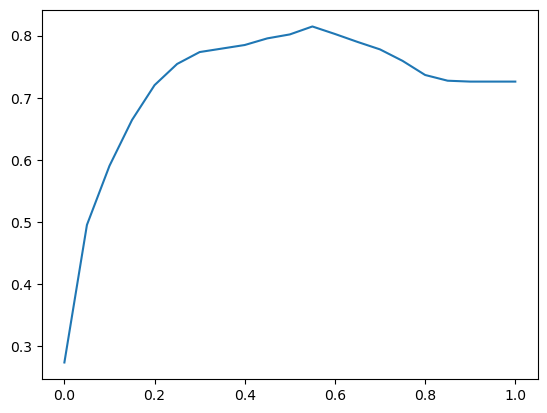

In [124]:
plt.plot(thresholds, scores)

In [125]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.8019872249822569

In [126]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)
# different accuracy

0.00 0.274
0.05 0.495
0.10 0.590
0.15 0.664
0.20 0.720
0.25 0.754
0.30 0.774
0.35 0.779
0.40 0.785
0.45 0.796
0.50 0.802
0.55 0.815
0.60 0.803
0.65 0.790
0.70 0.778
0.75 0.759
0.80 0.737
0.85 0.727
0.90 0.726
0.95 0.726
1.00 0.726


In [127]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [128]:
1 - y_val.mean()

0.7260468417317246

# CONFUSION TABLE
## different tpes of errors and correct decisions
## arranging them in a table

In [129]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [130]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [131]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()


In [132]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [133]:
fn, fp

(176, 103)

In [134]:
confusion_matrix = np.array([
    [tn , fp],
    [fn, tp]
])
confusion_matrix

array([[920, 103],
       [176, 210]])

In [135]:
# percents
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

# PRECISION AND RECALL

In [136]:
(tp + tn) / (tp + tn + fp + fn)

0.8019872249822569

In [137]:
# precision
p = tp / (tp + fp)
p

0.670926517571885

In [138]:
tp + fp

313

In [139]:
r = tp / (tp + fn)
r

0.5440414507772021

# ROC Curves

In [140]:
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [141]:
fpr = fp / (fp + tn )
fpr

0.10068426197458455

In [142]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [143]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,365,556,21,467,0.945596,0.543500
20,0.2,330,338,56,685,0.854922,0.330401
30,0.3,293,226,93,797,0.759067,0.220919
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,103,176,920,0.544041,0.100684
60,0.6,158,50,228,973,0.409326,0.048876
70,0.7,93,20,293,1003,0.240933,0.019550
80,0.8,17,2,369,1021,0.044041,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


In [144]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [145]:
#values for the confusion table
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,365,556,21,467,0.945596,0.543500
20,0.2,330,338,56,685,0.854922,0.330401
30,0.3,293,226,93,797,0.759067,0.220919
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,103,176,920,0.544041,0.100684
60,0.6,158,50,228,973,0.409326,0.048876
70,0.7,93,20,293,1003,0.240933,0.019550
80,0.8,17,2,369,1021,0.044041,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


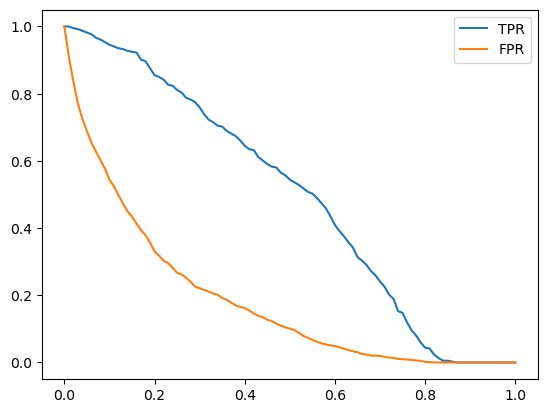

In [146]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [147]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

# Random model 

In [148]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))


In [149]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [150]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


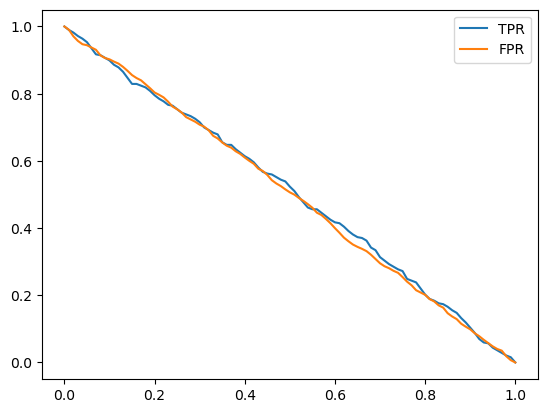

In [151]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

# Ideal model

In [152]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [153]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [154]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [155]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [156]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)


In [157]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


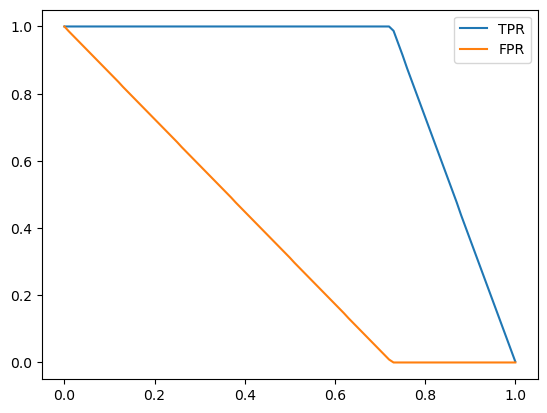

In [158]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

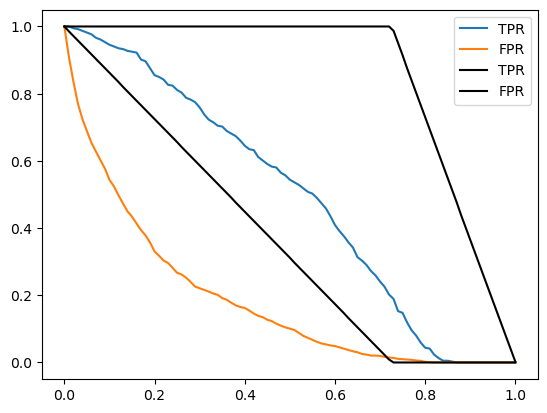

In [159]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')



plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')
plt.legend()

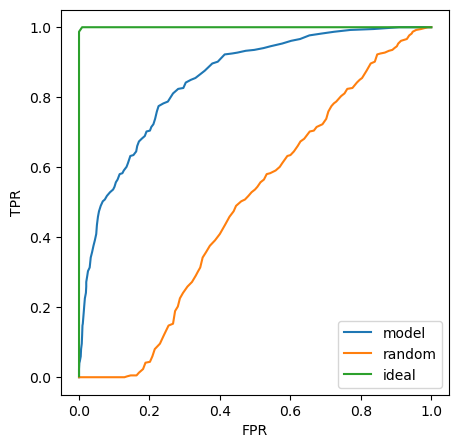

In [160]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_scores.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()


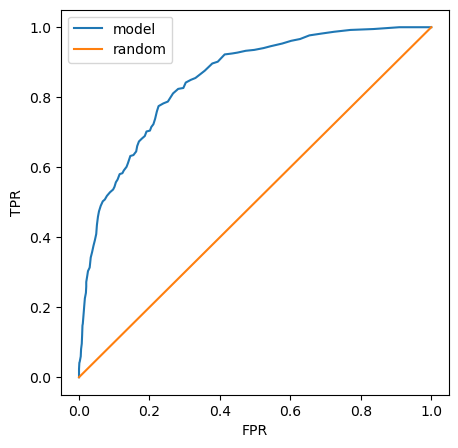

In [161]:
plt.figure(figsize=(5, 5))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
# the roc curve

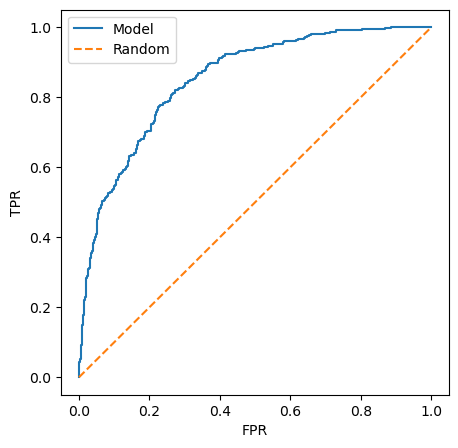

In [162]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


# ROC AUC
## area under the ROC curve 
## interprating the AUC

In [163]:
from sklearn.metrics import auc

In [164]:
# area under the curve 
auc(fpr, tpr)

0.8510831193431895

In [165]:
auc(df_scores.fpr, df_scores.tpr)

0.8505943607899149

In [166]:
# area of the ideal
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [167]:
# arae under roc curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)


0.8510831193431895

In [168]:
# using a builtin
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8510831193431895

In [169]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [170]:
import random

pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [171]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1
success / n

0.85099

In [172]:
# using numpy
np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

0.84994

# Cross-Validation
### evaluating the same model on differnet subsets of data
### getting the average prediction and the spread within predictions

In [173]:
 def train(df, y_train, C=1.0):
     dicts = df[categorical + numerical].to_dict(orient='records')
     
     dv = DictVectorizer(sparse=False)
     X_train = dv.fit_transform(dicts)
     
     model = LogisticRegression(C=C, max_iter=1000)
     model.fit(X_train, y_train)
     
     return dv, model


In [174]:
dv, model = train(df_train, y_train, C=0.001)

In [175]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [176]:
y_pred = predict(df_val, dv, model)

In [177]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [178]:
# kfold.split(df_full_train)

In [179]:
# train_idx, val_idx = next(kfold.split(df_full_train))

In [180]:
# len(train_idx), len(val_idx)

In [181]:
# len(df_full_train)

In [182]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [183]:
from tqdm.auto import tqdm

In [184]:
n_splits = 5
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.841 +- 0.007
C=1 0.840 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.007


In [185]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)
    
auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

In [186]:
np.mean(scores), np.std(scores)

(0.840729140725883, 0.007120819335939517)

In [187]:
len(train_idx), len(val_idx)

(4508, 1126)

In [188]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.841 +- 0.007


# summary 
### metric - single number that decribes the performance of a model
### accuracy - fraction of correct answers; sometimes misleading
### Precision and recall are less misleading when we have class inbalance
### ROC Curve - a way to evaluate the performance at all thresholds okay to use imbalance
### K-FoldCV - more reliable estimate for performance(mean + std)

In [192]:
import pickle
C=1.0

output_file = f'model_C={C}.bin'
output_file

'model_C=1.0.bin'

In [193]:
f_out = open(output_file, 'wb')

pickle.dump((dv, model), f_out)
f_out.close()

In [194]:
import pickle

model_file = 'model_C=1.0.bin'

with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [195]:
dv, model

(DictVectorizer(sparse=False), LogisticRegression(max_iter=1000))

In [ ]:
row_7_without_customerid = df.iloc[7].drop("customerid").drop("churn")

In [217]:
customer = dict(row_7_without_customerid)
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 10,
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 29.75,
 'totalcharges': 301.9}

In [ ]:
X = dv.transform([customer])

In [216]:
model.predict_proba(X)[0, 1]

0.2483718852938227